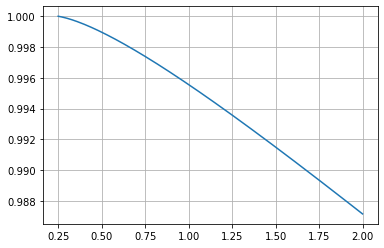

In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
from math import factorial

x=sympy.symbols('x')
y=sympy.Function('y')(x)

x0=0.25
y0=1
h=0.01

yl=[] #лист со значениями 1й и 2й производной
x_x=[x0] #лист для отрисовки(x)
y_y=[] #лист для отрисовки(y)

def Sympy(f,x_x,y_y): 
    f=sympy.Add(f)
    f=f.subs({x:x_x,y:y_y})
    return float(f)

def Taylor(y1,y2,x): #ряд Тейлора 
    return 1+h*y1/(factorial(1))*(x-0.25)+(h/2)*y2/(factorial(2))*(x-0.25)**2

def Idiff(func): #производная неявной функции 
    f=sympy.idiff(func,y,x)
    return f

funcc=-x*(y**4+1)/(2*(x*y+y)) #1я производная
val=Sympy(funcc,x0,y0)
yl.append(val)
func1=Idiff(funcc) #2я производная
val=Sympy(func1,x0,y0)
yl.append(val)
y0=Taylor(yl[0],yl[1],x0)
y_y.append(y0)

while abs(x0)<2:
    x0=x0+h #изменение x
    x_x.append(x0)
    y0=Taylor(yl[0],yl[1],x0)
    y_y.append(y0)
    val=Sympy(funcc,x0,y0) #замена 1й производной при новом x
    yl[0]=val
    val=Sympy(func1,x0,y0) #замена 2й производной при новом x
    yl[1]=val
plt.plot(x_x,y_y)
plt.grid()